# Building Energy Performance (2017–2020)
**Dataset:** ListingofBuildingEnergyPerformanceData2020.csv  
**Source:** BCA / data.gov.sg

**Goal:** Produce five clear visualizations to describe energy use intensity (EUI) and drivers of building energy performance:
1. Boxplot of EUI (2020) by `buildingtype`  
2. Bar chart: Average EUI (2020) by `buildingtype` (with error bars)  
3. Scatter: Gross Floor Area vs EUI (2020) + trendline & correlation  
4. Scatter: Centralised AC Plant Efficiency vs EUI (2020) + trendline  
5. Trend lines (2017→2020) of mean EUI by `buildingtype`

We use `buildingtype` for grouping (coarse categories), to keep visuals clean and easy to interpret.

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Corporate visualization style
sns.set_theme(style="whitegrid", font_scale=1.2)


##  2. Load Dataset

In [2]:
df = pd.read_csv("ListingofBuildingEnergyPerformanceData2020.csv", low_memory=False)

# Show structure
print("Rows:", len(df))
df.head()

Rows: 564


,buildingname,buildingaddress,buildingtype,mainbuildingfunction,buildingsize,yearobtainedtopcsc,greenmarkrating,greenmarkyearofaward,greenmarkversion,grossfloorarea,...,typeofairconditioningsystem,ageofchiller,centralisedairconditioningplantefficiency,yearoflastchillerplantaudithealthcheck,percentageusageofled,installationofsolarpv,2017,2018,2019,2020
0,UNITED SQUARE,"101 THOMSON ROAD, SINGAPORE 307591",Commercial Building,Mixed Development,Large,1984,NaN,NaN,NaN,"65,947",...,Water Cooled Chilled Water Plant,12.0,0.68,2019.0,2%,N,281.32,276.83,274.91,250.89
1,HPL HOUSE,"50 CUSCADEN ROAD, SINGAPORE 249724",Commercial Building,Office,Small,1980,NaN,NaN,NaN,"7,372",...,Others,2.0,NaN,NaN,80%,N,277.93,268.76,264.79,216.27
2,GRACE GLOBAL RAFFLES,"137 MARKET STREET, SINGAPORE 048943",Commercial Building,Office,Small,2011,GoldPlus,2010.0,New Building for Non-Residential buildings (ve...,"5,030",...,Others,9.0,NaN,NaN,20%,N,171.16,165.32,165.52,115.42
3,THE GLOBE,"100 CECIL STREET, SINGAPORE 069532",Commercial Building,Office,Small,1993,NaN,NaN,NaN,"5,824",...,Others,0.0,NaN,NaN,30%,N,185.64,168.50,163.46,138.01
4,HIGH STREET PLAZA,"77 HIGH STREET, SINGAPORE 179433",Commercial Building,Office,Small,1975,NaN,NaN,NaN,"10,418",...,Water Cooled Chilled Water Plant,38.0,0.80,2020.0,90%,N,158.37,140.95,149.12,129.54


## 3. Basic Cleaning

In [3]:
# Keep only relevant columns
cols = [
    'buildingname','buildingtype','mainbuildingfunction','buildingsize',
    'centralisedairconditioningplantefficiency','grossfloorarea',
    '2020','2019','2018','2017'
]
df = df[cols]

# Convert EUI columns to numeric
for year in ['2020','2019','2018','2017']:
    df[year] = pd.to_numeric(df[year], errors='coerce')

# Drop rows missing 2020 EUI (main variable in visuals)
df_clean = df.dropna(subset=['2020'])

# Make names cleaner for plots
df_clean['buildingtype'] = df_clean['buildingtype'].str.title()
df_clean['mainbuildingfunction'] = df_clean['mainbuildingfunction'].str.title()
df_clean['buildingsize'] = df_clean['buildingsize'].str.title()


## 4. Visualization 1 — EUI (2020) distribution

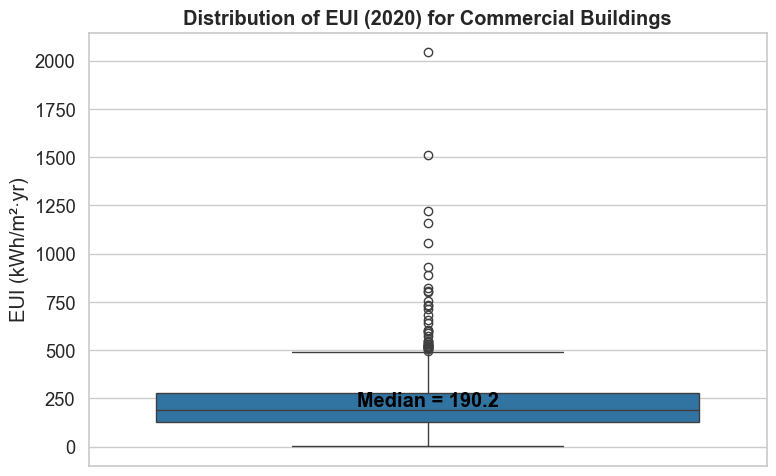

In [4]:
plt.figure(figsize=(8,5))
ax = sns.boxplot(data=df_clean, y='2020', color="#1f77b4")

median_val = df_clean['2020'].median()
ax.text(0, median_val, f"Median = {median_val:.1f}", 
        color="black", ha='center', va='bottom', fontweight='bold')

plt.title("Distribution of EUI (2020) for Commercial Buildings", fontweight='bold')
plt.ylabel("EUI (kWh/m²·yr)")
plt.tight_layout()
plt.savefig("v1_eui_distribution.png", dpi=300, bbox_inches='tight')
plt.show()


## 5. Visualization 2: EUI by Main Building Function

C:\Users\amali\AppData\Local\Temp\ipykernel_25992\1938994607.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df_clean, x='mainbuildingfunction', y='2020', palette="Blues")


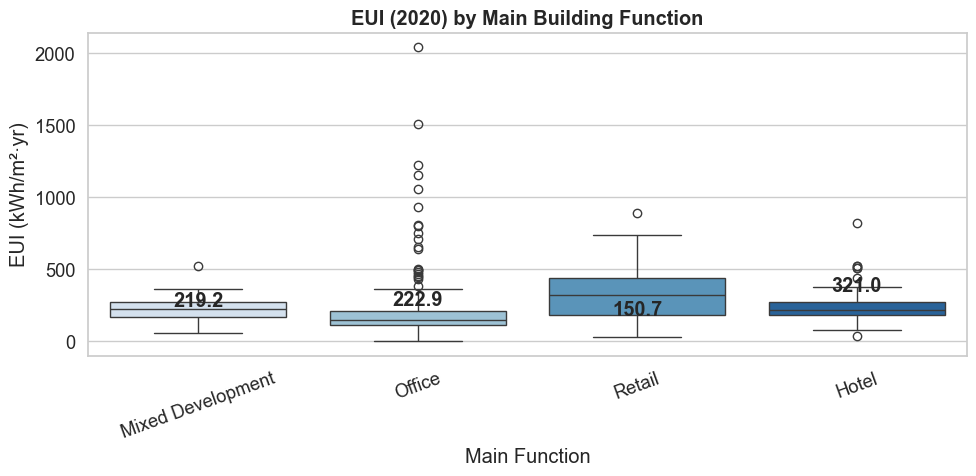

In [5]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(data=df_clean, x='mainbuildingfunction', y='2020', palette="Blues")
plt.title("EUI (2020) by Main Building Function", fontweight='bold')
plt.xlabel("Main Function")
plt.ylabel("EUI (kWh/m²·yr)")
plt.xticks(rotation=20)

medians = df_clean.groupby('mainbuildingfunction')['2020'].median()
for xtick in ax.get_xticks():
    val = medians.iloc[xtick]
    ax.text(xtick, val, f"{val:.1f}", ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig("v2_eui_by_function.png", dpi=300, bbox_inches='tight')
plt.show()


## 6. Visualization 3: EUI (2020) by Building Size Category

In [6]:
# Create subset for buildings with size + EUI data
size_eui = df_clean.dropna(subset=['buildingsize', '2020'])


C:\Users\amali\AppData\Local\Temp\ipykernel_25992\608661293.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=size_eui, x='buildingsize', y='2020', palette="Blues")


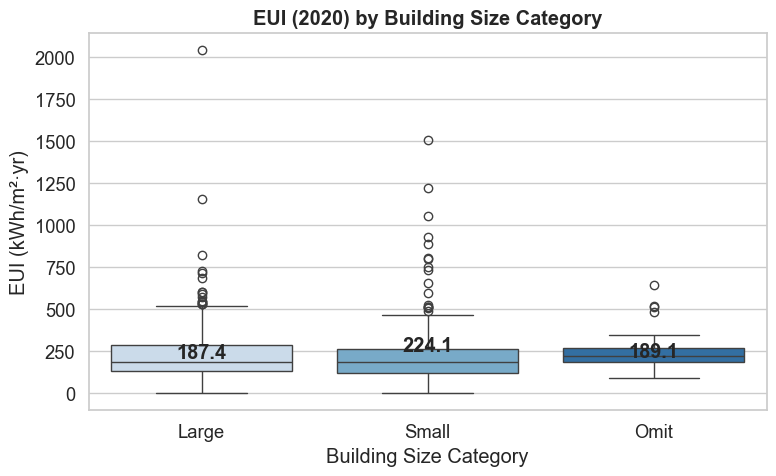

In [7]:
plt.figure(figsize=(8,5))
ax = sns.boxplot(data=size_eui, x='buildingsize', y='2020', palette="Blues")
plt.title("EUI (2020) by Building Size Category", fontweight='bold')
plt.xlabel("Building Size Category")
plt.ylabel("EUI (kWh/m²·yr)")

medians = size_eui.groupby('buildingsize')['2020'].median()
for xtick in ax.get_xticks():
    val = medians.iloc[xtick]
    ax.text(xtick, val, f"{val:.1f}", ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig("v3_eui_by_size.png", dpi=300, bbox_inches='tight')
plt.show()


## 7. Visualization 4: Chiller Efficiency vs EUI

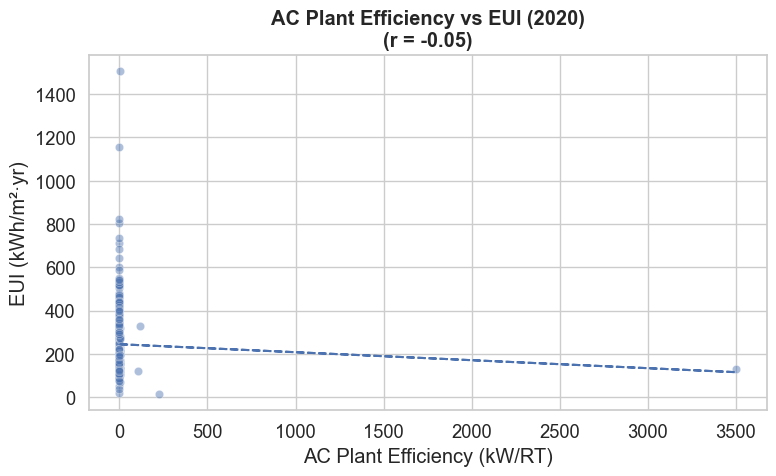

In [8]:
eff = df_clean.dropna(subset=['centralisedairconditioningplantefficiency'])
x = eff['centralisedairconditioningplantefficiency']
y = eff['2020']

# Fit line
coef = np.polyfit(x, y, 1)
poly1d_fn = np.poly1d(coef)

corr = np.corrcoef(x, y)[0,1]

plt.figure(figsize=(8,5))
sns.scatterplot(x=x, y=y, alpha=0.45)
plt.plot(x, poly1d_fn(x), linestyle="--")

plt.title(f"AC Plant Efficiency vs EUI (2020)\n(r = {corr:.2f})", fontweight='bold')
plt.xlabel("AC Plant Efficiency (kW/RT)")
plt.ylabel("EUI (kWh/m²·yr)")
plt.tight_layout()
plt.savefig("v4_ac_efficiency_vs_eui.png", dpi=300, bbox_inches='tight')
plt.show()


##  8. Visualization 5: Trend in Mean EUI (2017→2020)

In [9]:
# Create trend dataframe (mean EUI by year)
trend = df_clean[['2020','2019','2018','2017']].mean().reset_index()
trend.columns = ['Year','Mean_EUI']
trend['Year'] = trend['Year'].astype(int)


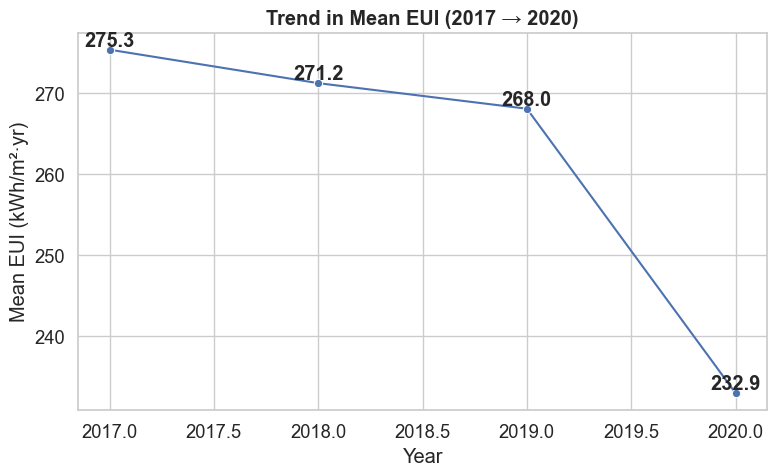

In [10]:
plt.figure(figsize=(8,5))
ax = sns.lineplot(data=trend, x='Year', y='Mean_EUI', marker='o')

for i, row in trend.iterrows():
    ax.text(row['Year'], row['Mean_EUI'], f"{row['Mean_EUI']:.1f}",
            ha='center', va='bottom', fontweight='bold')

plt.title("Trend in Mean EUI (2017 → 2020)", fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Mean EUI (kWh/m²·yr)")
plt.tight_layout()
plt.savefig("v5_eui_trend.png", dpi=300, bbox_inches='tight')
plt.show()
